#### PROBLEM STATEMENT-
Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


Approach - A Random Forest can be built with  taxable_income  variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

#### Importing packages

In [3]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Reading the data

In [5]:
# Data Preparation

In [7]:
df_data= pd.read_csv("E:\\deeksha\\python\\data\\Fraud_check.csv")

In [8]:
df_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


#### Checking shape and size of the data

In [9]:
df_data.shape , df_data.size

((600, 6), 3600)

#### Checking for nulls, na's and duplicates in data


In [12]:
df_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [13]:
# checking na values

In [14]:
df_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [15]:
# checking any duplicate values

In [16]:
df_data.duplicated().sum()

0

#### Checking Features

In [18]:
df_data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

#### Checking Uniques values in Features

In [21]:
df_data['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [22]:
df_data['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [23]:
df_data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

#### PERFORMING EDA ON DATA

In [24]:
# HISTOGRAM 

array([[<AxesSubplot:title={'center':'Taxable.Income'}>,
        <AxesSubplot:title={'center':'City.Population'}>],
       [<AxesSubplot:title={'center':'Work.Experience'}>, <AxesSubplot:>]],
      dtype=object)

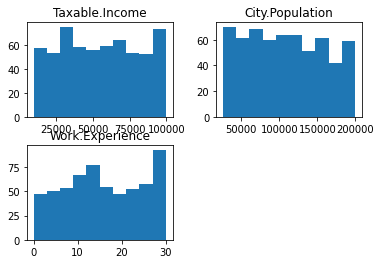

In [25]:
df_data.hist(grid=False)

In [30]:
df_data.groupby('Marital.Status')['Marital.Status'].count()

Marital.Status
Divorced    189
Married     194
Single      217
Name: Marital.Status, dtype: int64

In [29]:
M_count = df_data.groupby('Marital.Status')['Marital.Status'].count()

In [31]:
df_m_count = df_data.groupby('Marital.Status')['Marital.Status'].count().reset_index(name="count")

In [32]:
df_m_count

,Marital.Status,count
0,Divorced,189
1,Married,194
2,Single,217


<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

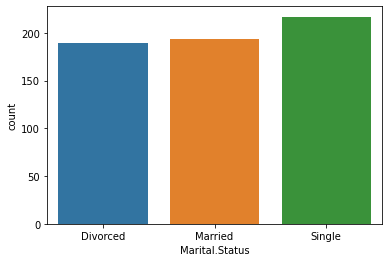

In [34]:
sns.barplot(x = "Marital.Status" ,y = "count", data= df_m_count)

In [35]:
df_data["Undergrad"].count()

600

In [36]:
df_Undergrad = df_data.groupby("Undergrad")["Undergrad"].count().reset_index(name = "Count")

<AxesSubplot:xlabel='Undergrad', ylabel='Count'>

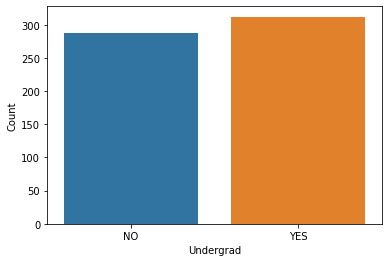

In [37]:
 sns.barplot(x = "Undergrad", y = "Count", data = df_Undergrad)

#### Correlation between features

In [38]:
df_data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

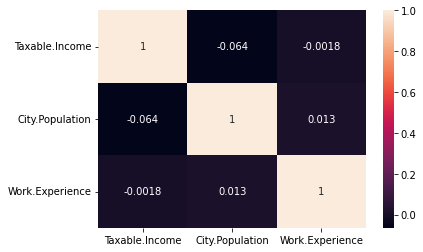

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(),annot=True)

#### Pairplot

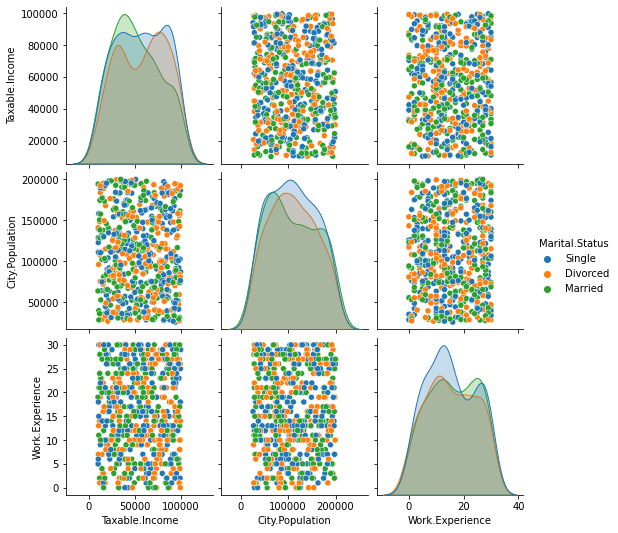

In [48]:
sns.pairplot(hue='Marital.Status' , data=df_data)

#### converting categorical features into numeric using 1-hot-encoding

In [50]:
df= pd.get_dummies(df_data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)

In [51]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


#### Dividing the data into two parts( independent variable(X), dependent variable(y))

In [52]:
X= df.drop(["Taxable.Income"],axis=1)

In [53]:
X.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0


In [54]:
Y= df["Taxable.Income"]

In [55]:
Y.head()

0    68833
1    33700
2    36925
3    50190
4    81002
Name: Taxable.Income, dtype: int64

In [56]:
## Checking shape of X, y
X.shape, Y.shape

((600, 6), (600,))

#### Splitting the data into train, test

In [57]:
from sklearn.model_selection import train_test_split ,GridSearchCV, KFold, cross_val_score
X_train,X_test, Y_train , Y_test = train_test_split(X,Y,test_size= 0.2, random_state=110)

In [58]:
X_train.head(3)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
159,28504,1,1,0,1,0
540,110308,22,1,0,1,0
460,54701,10,0,0,0,1


In [59]:
X_test.head(3)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
579,125112,7,1,0,1,1
127,93035,28,0,0,1,1
90,101232,29,0,0,0,0


In [60]:
Y_train.head(3)

159    62209
540    12682
460    58199
Name: Taxable.Income, dtype: int64

In [61]:
Y_test.head(3)

579    70572
127    75501
90     77634
Name: Taxable.Income, dtype: int64

In [62]:
## Checking Shapes

In [63]:
X_train.shape 

(480, 6)

In [64]:
Y_train.shape

(480,)

#### Building a Model using Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
model = RandomForestRegressor(n_estimators=100, max_features=5,random_state=80)

In [67]:
model.fit(X_train, Y_train)

RandomForestRegressor(max_features=5, random_state=80)

In [68]:
y_pred = model.predict(X_train)

In [69]:
y_pred

array([62821.04, 31149.3 , 56855.41, 54598.82, 51295.16, 43552.08,
       63344.37, 57935.15, 47767.67, 26403.45, 54806.95, 70299.88,
       30173.23, 58777.41, 42834.44, 53691.98, 40809.19, 79021.66,
       45206.75, 32286.29, 77475.94, 73747.08, 30525.77, 25536.63,
       68980.95, 85929.94, 77469.52, 61233.55, 30045.51, 75718.94,
       38941.4 , 72254.32, 54328.77, 51511.11, 40827.87, 57453.97,
       68234.59, 39465.88, 20539.01, 62824.76, 73766.7 , 60158.9 ,
       58719.59, 61183.06, 49468.17, 63012.47, 34447.79, 40896.86,
       74323.44, 29654.73, 76056.05, 72965.3 , 31372.78, 71598.7 ,
       42235.94, 83750.38, 69191.63, 76714.75, 61236.79, 56326.51,
       71369.66, 89534.01, 26257.  , 81246.53, 54461.55, 63217.1 ,
       68944.43, 81888.67, 76528.86, 69656.23, 78145.83, 65117.59,
       79729.2 , 38247.82, 43430.2 , 44813.42, 44756.76, 54098.28,
       48645.2 , 40891.24, 35723.41, 34848.87, 59699.6 , 74939.62,
       42860.43, 45815.68, 43797.99, 49753.73, 40480.3 , 57974

In [70]:
y_pred_test = model.predict(X_test)

In [72]:
y_pred_test

array([24078.04, 55937.5 , 56107.99, 59511.6 , 48209.93, 48114.59,
       45711.87, 75845.09, 69322.56, 61633.63, 51117.84, 68694.69,
       63762.39, 77669.8 , 43752.75, 60651.21, 54990.48, 69221.63,
       73318.38, 62278.74, 65084.32, 50834.46, 67846.97, 45994.76,
       69672.49, 72945.82, 50166.77, 60454.9 , 49730.87, 66276.62,
       53061.53, 63688.85, 28159.22, 60449.33, 45774.64, 56483.64,
       79424.77, 47912.57, 58657.78, 42483.11, 75373.31, 72124.83,
       74995.09, 46831.45, 53970.46, 60628.76, 67529.82, 53878.92,
       44163.35, 62865.59, 70184.64, 63189.85, 51920.87, 68804.76,
       63188.45, 59541.32, 51956.65, 61967.43, 32613.91, 69567.36,
       66299.29, 71252.34, 41513.8 , 56107.35, 30920.77, 69820.33,
       60633.58, 53139.47, 71865.  , 38607.75, 47183.27, 47085.32,
       38008.91, 46704.87, 48233.74, 58573.42, 80023.07, 48840.17,
       62582.97, 48410.89, 55068.24, 54006.28, 56836.01, 66018.5 ,
       56563.04, 31912.41, 52291.51, 56519.5 , 40549.23, 48829

In [73]:
y_pred = pd.DataFrame(y_pred , columns = ['ypredict'])

In [74]:
y_pred

,ypredict
0,62821.04
1,31149.30
2,56855.41
3,54598.82
4,51295.16
...,...
475,47490.54
476,57264.49
477,48511.46
478,36760.70


#### Checking R-square

In [76]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [77]:
metrics.r2_score(Y_train,y_pred)

0.8268560251011638

In [78]:
print('The training r2_score is ', metrics.r2_score(Y_train,y_pred))

The training r2_score is  0.8268560251011638


In [79]:
metrics.r2_score(Y_test,y_pred_test)

-0.1378932286011587

In [80]:
print('The training r2_score is ', metrics.r2_score(Y_test,y_pred_test))

The training r2_score is  -0.1378932286011587


In [82]:
model.feature_importances_

array([0.53485493, 0.2780777 , 0.05218195, 0.03946583, 0.04251433,
       0.05290526])

In [83]:
X.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0


#### Checking which features are important

<AxesSubplot:>

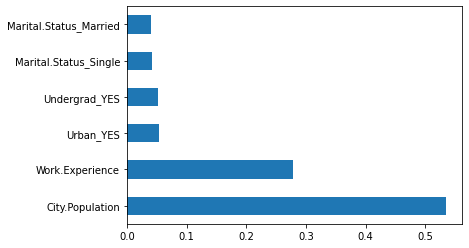

In [84]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).nlargest(100).plot(kind='barh')

#### Using Grid Search Cv

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
estimator = RandomForestRegressor()
para_grids = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
           
      
        }

grid = GridSearchCV(model, para_grids, scoring = 'r2')
grid.fit(X_train, Y_train)
forest = grid.best_estimator_


In [98]:
num_trees = 150
max_features = 5
kfold = KFold(n_splits=5)

model = RandomForestRegressor(n_estimators=num_trees, max_features=10,random_state=90)
grid = GridSearchCV(model, para_grids, scoring = 'r2')
grid.fit(X_train, Y_train)
forest = grid.best_estimator_

In [99]:
forest

RandomForestRegressor(max_features='log2', random_state=90)

In [100]:
y_pred_cv = forest.predict(X_test)

In [101]:
metrics.r2_score(Y_test,y_pred_cv)

-0.09948200336650892